In [1]:
#pip install POT
#import POT_calculate as POT
#POT.POT_calculate()

In [2]:
import numpy as np  # always need it
import ot  # ot
import time
import os
os.environ['CXX'] = 'g++-8'
from mpl_toolkits.mplot3d import Axes3D  # noqa
import scipy as sp
import matplotlib.pylab as pl
import matplotlib.pyplot as plt
from scipy.io import savemat
from scipy.sparse import random
from mpl_toolkits.mplot3d import Axes3D

In [3]:
from scipy.io import loadmat

# 读取 .mat 文件
Pointcld_1 = loadmat('PointCloud_pure_square1.mat');
Pointcld_2 = loadmat('PointCloud_pure_square2.mat');
ptcld_1 = Pointcld_1['PointCloud'];
ptcld_2 = Pointcld_2['PointCloud'];
    

In [4]:
ptcld_1

array([[-5.65983312e+00,  3.82341068e+00, -1.75029698e+00,
        -1.00674723e-02],
       [-5.67664659e+00,  3.83616827e+00, -1.75492244e+00,
         1.52400764e-01],
       [-5.70942199e+00,  3.86317720e+00, -1.76365575e+00,
        -9.37096017e-03],
       [-5.54267471e+00,  4.01337892e+00,  2.44427438e+00,
        -8.87629484e-03],
       [-5.53019867e+00,  4.05538722e+00,  2.53027045e+00,
        -1.28988091e-02],
       [-5.48659416e+00,  4.08668487e+00,  2.63505557e+00,
         1.26585635e-01],
       [-5.57048481e+00,  4.09911824e+00,  2.55897152e+00,
        -1.36278182e-02],
       [-5.63366489e+00,  4.14836214e+00,  2.46418703e+00,
        -1.11325299e-02],
       [-5.65578675e+00,  4.05009581e+00,  2.69624285e+00,
        -1.05755901e-02],
       [-4.79499727e+00,  4.95572050e+00,  2.95890174e+00,
        -1.05362765e-02],
       [-1.45380309e+00, -4.45011051e+00,  5.91931544e+00,
        -1.06563683e-02],
       [-9.89695709e-01, -6.25228514e+00,  4.18778378e+00,
      

In [5]:
xs = abs(ptcld_1[:,3]);#
xt = abs(ptcld_2[:,3]);
cld1_pos = ptcld_1[:,0:3];
cld2_pos = ptcld_2[:,0:3];

In [6]:
total = np.sum(xs)
normalized_xs = xs/total
total = np.sum(xt)
normalized_xt = xt/total

In [7]:
xs

array([0.01006747, 0.15240076, 0.00937096, 0.00887629, 0.01289881,
       0.12658563, 0.01362782, 0.01113253, 0.01057559, 0.01053628,
       0.01065637, 0.01091275, 0.01139197, 0.01213125, 0.01353947,
       0.0166929 , 0.02935091, 0.05450297, 0.08926466, 0.03836687,
       0.01073182, 0.02429055, 0.0224787 , 0.0242908 , 0.01052104,
       0.03686347, 0.0883083 , 0.03111158, 0.01807107, 0.01468803,
       0.0302493 , 0.09224576, 0.03894862, 0.0247466 , 0.01250285,
       0.01166478, 0.02523162, 0.0564753 , 0.06064835, 0.03002244,
       0.01696088, 0.01287146, 0.01041265, 0.00856829, 0.00845759,
       0.01101127, 0.01888831, 0.02853961, 0.07966502, 0.02259553,
       0.01138443, 0.07676759, 0.01022528, 0.00945978, 0.0192716 ,
       0.07390341, 0.03030348, 0.01658019, 0.00937012, 0.00958384,
       0.01132541, 0.07047953, 0.01932194, 0.01576718, 0.00841168,
       0.02391272, 0.05771015, 0.02839438, 0.01305807, 0.01102653,
       0.01488804, 0.06378416, 0.01599915, 0.00842451, 0.00825

In [8]:
? ot.partial

Type:        module
String form: <module 'ot.partial' from 'D:\\anacoda\\envs\\python10\\lib\\site-packages\\ot\\partial.py'>
File:        d:\anacoda\envs\python10\lib\site-packages\ot\partial.py
Docstring:   Partial OT solvers

In [9]:
cld1_pos.shape

(219, 3)

In [10]:
M = ot.dist(cld1_pos,cld2_pos)

In [11]:
M.shape

(219, 230)

In [12]:
gamma, log_emd= ot.partial.partial_wasserstein(normalized_xs, normalized_xt, M, m = 0.8, nb_dummies = 10, log = True)

In [13]:
gamma.shape

(219, 230)

In [14]:
log_emd

{'cost': 12.46112794434537,
 'u': array([ 1.22334858e+01,  1.22153815e+01,  1.21333070e+01,  1.17009207e+01,
         1.18875688e+01,  1.21674807e+01,  1.16873697e+01,  1.12949536e+01,
         1.03858637e+01,  1.82047257e+01,  1.82047257e+01,  1.82047257e+01,
        -1.03311518e+00,  2.78259290e+00,  6.37422526e+00,  7.75420863e+00,
         7.64332708e+00,  7.52222322e+00,  6.91057932e+00,  7.18372545e+00,
         6.50717516e+00,  4.59076838e+00,  2.16594074e+00, -5.64916450e-01,
        -5.45475728e-01, -6.38477178e-01,  1.04775301e+00,  1.54557182e+00,
         2.58508526e+00, -2.77289775e+00,  1.82047257e+01,  1.82047257e+01,
         1.82047257e+01,  1.82047257e+01,  1.81728465e+01,  1.82047257e+01,
         1.82047257e+01,  1.82047257e+01,  1.82047257e+01,  1.81912067e+01,
         1.81482659e+01,  1.81597332e+01,  1.41218350e+01,  1.58051494e+01,
         1.53566849e+01,  1.31490373e+01,  1.23137158e+01,  1.14649988e+01,
         1.13411434e+01,  1.00839897e+01,  1.82047257e+

In [15]:
log_emd['u'].shape

(219,)

In [16]:
# 准备要保存的数据
data_to_save = {
    'cost': log_emd['cost'],
    'u': log_emd['u'],
    'v': log_emd['v']
}

# 保存数据到 .mat 文件
#savemat('log_emd.mat', {'log_emd': data_to_save})
#savemat('T.mat',{'T': gamma})

Text(0, 0.5, 'cost')

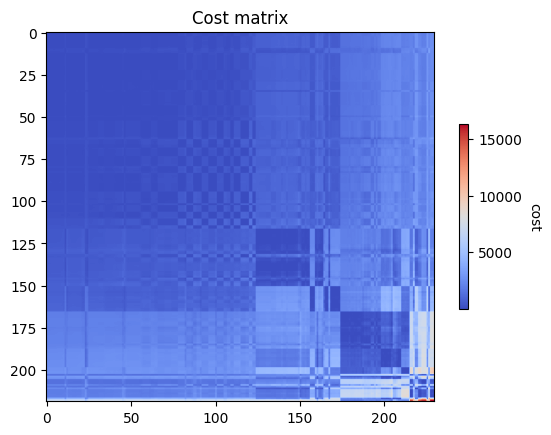

In [17]:
im = pl.imshow(M, cmap="coolwarm")
pl.title('Cost matrix')
cbar = pl.colorbar(im, shrink=0.5, use_gridspec=True)
cbar.ax.set_ylabel("cost", rotation=-90, va="bottom")

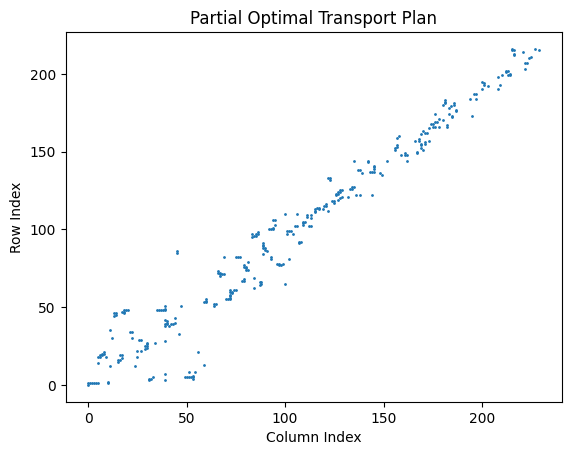

In [18]:
# 获取非零点的坐标
nonzero_indices = gamma.nonzero()

# 绘制非零点
plt.scatter(nonzero_indices[1], nonzero_indices[0], s=1)
plt.xlabel('Column Index')
plt.ylabel('Row Index')
plt.title('Partial Optimal Transport Plan')
plt.show()

In [19]:
gamma.shape

(219, 230)

In [20]:
len(cld1_pos)

219

In [21]:
big = gamma.max()

In [22]:
nonzero_indices[1]

array([  0,   0,   1,   2,   3,   4,   5,  10,  10,  31,  39,  31,  32,
        53,  33,  49,  50,  51,  52,  53,  53,  39,  51,  54,  11,  24,
        59,   5,  15,  15,  16,  17,   5,   6,   9,  25,   6,   7,  16,
        17,   7,   8,   8,  56,  25,  27,  29,  30,  29,  30,  30,  30,
        34,  39,  26,  27,  12,  22,  46,  21,  22,  11,  39,  41,  39,
        40,  42,  43,  40,  44,  40,  39,  44,  13,  14,  13,  14,  18,
        17,  18,  18,  19,  20,  35,  36,  37,  38,  39,  39,  39,  47,
        64,  64,  65,  59,  60,  60,  60,  70,  71,  72,  72,  72,  72,
        73,  72,  73,  72,  74,  75,  84,  87,  88, 100,  87,  88,  78,
        79,  79,  84,  67,  67,  68,  69,  66,  67,  66,  80,  81,  80,
        79,  80,  79,  97,  98,  96,  97,  99,  81,  93, 102,  69,  75,
        76,  77,  93,  89,  45,  45,  91,  90,  89,  90,  89,  89,  89,
       107, 107, 108,  83,  84,  85,  83,  85,  86, 101, 104,  86, 101,
       102, 103,  92,  93,  94,  94, 105, 106, 112, 113,  95, 10

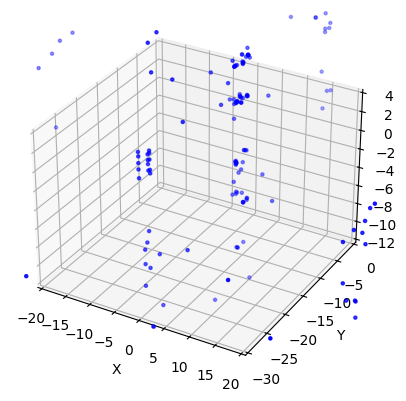

In [23]:
# 创建一个 3D 图形对象
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = cld1_pos[:, 0]
y = cld1_pos[:, 1]
z = cld1_pos[:, 2]
# 使用 plot() 函数绘制线条
ax.scatter(x, y, z, c='b', marker='.')
ax.set_xlim([-20, 20])
ax.set_ylim([-30, 0])
ax.set_zlim([-12, 4])
# 设置坐标轴标签
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
# 显示图形
plt.show()


In [24]:
import sys

print("当前 Python 版本是：", sys.version)

当前 Python 版本是： 3.10.14 | packaged by Anaconda, Inc. | (main, Mar 21 2024, 16:20:14) [MSC v.1916 64 bit (AMD64)]
